In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

In [4]:
from yahooquery import Ticker

# Set the ticker symbol
ticker = "NVDA"  # For Nvidia on NASDAQ, use "NVDA" instead of "NVDA.NS"

# Initialize Ticker object
stock = Ticker(ticker)

# Get historical data
data = stock.history(start="2021-07-23", end="2024-07-23")

# Display the data
print(data)

C:\Users\dhanv\anaconda3\Jupiter\Lib\site-packages\yahooquery\utils\__init__.py:1470: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  has_live_indice = index_utc[-1] >= last_trade - pd.Timedelta(2, "S")


                         open        high         low       close     volume  \
symbol date                                                                    
NVDA   2021-07-23   19.656000   19.700001   19.250000   19.558001  195672000   
       2021-07-26   19.311001   19.441999   18.914000   19.294001  203943000   
       2021-07-27   19.264999   19.622000   18.740999   19.208000  248863000   
       2021-07-28   19.319000   19.646000   18.995001   19.503000  202191000   
       2021-07-29   19.518999   19.853001   19.327999   19.662001  190781000   
...                       ...         ...         ...         ...        ...   
       2024-07-16  128.440002  129.039993  124.580002  126.360001  214769500   
       2024-07-17  121.349998  121.849998  116.720001  117.989998  390086200   
       2024-07-18  121.849998  122.400002  116.559998  121.089996  320979500   
       2024-07-19  120.349998  121.599998  117.370003  117.930000  217223800   
       2024-07-22  120.349998  124.07000

C:\Users\dhanv\anaconda3\Jupiter\Lib\site-packages\yahooquery\ticker.py:1333: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["dividends"].fillna(0, inplace=True)
C:\Users\dhanv\anaconda3\Jupiter\Lib\site-packages\yahooquery\ticker.py:1335: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [6]:
data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'adjclose', 'dividends',
       'splits'],
      dtype='object')

In [8]:
market = data["adjclose"]
returns = 100 * market.pct_change().dropna() # Volatility


In [10]:
data['Returns'] = data['adjclose'].pct_change()

In [12]:
returns = data['Returns'].dropna()

In [14]:
returns = returns[np.isfinite(returns)]

In [16]:
#Fit an ARCH model to the cleaned returns
model = arch_model(returns, vol='ARCH', p=1)
fitted_model = model.fit()

#Print the summary of the fitted model
print(fitted_model.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1024924933.3247902
Iteration:      2,   Func. Count:     15,   Neg. LLF: -950.5298274657292
Iteration:      3,   Func. Count:     22,   Neg. LLF: -1467.3908821565983
Iteration:      4,   Func. Count:     26,   Neg. LLF: -1466.4874933827105
Iteration:      5,   Func. Count:     31,   Neg. LLF: -1467.419524382685
Iteration:      6,   Func. Count:     34,   Neg. LLF: -1467.4195237583033
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1467.419524382685
            Iterations: 6
            Function evaluations: 34
            Gradient evaluations: 6
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                1467.42
Distribution:                  Norm

C:\Users\dhanv\anaconda3\Jupiter\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [20]:
print(type(fitted_model.conditional_volatility))
print(fitted_model.conditional_volatility)


<class 'pandas.core.series.Series'>
symbol  date      
NVDA    2021-07-26    0.03438
        2021-07-27    0.03438
        2021-07-28    0.03438
        2021-07-29    0.03438
        2021-07-30    0.03438
                       ...   
        2024-07-16    0.03438
        2024-07-17    0.03438
        2024-07-18    0.03438
        2024-07-19    0.03438
        2024-07-22    0.03438
Name: cond_vol, Length: 752, dtype: float64


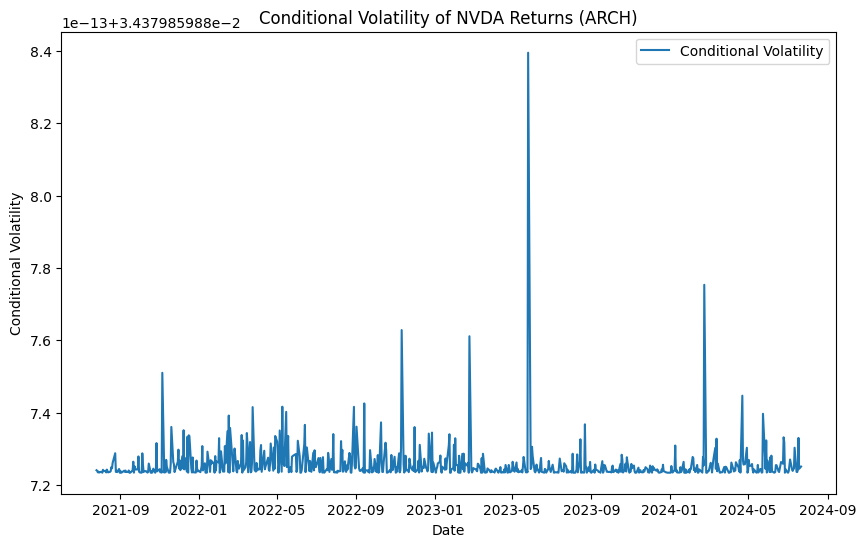

In [22]:
import matplotlib.pyplot as plt

# Reset the index to make 'symbol' and 'date' columns
conditional_volatility = fitted_model.conditional_volatility.reset_index()

# Filter the data for the specific ticker (e.g., NVDA)
ticker_data = conditional_volatility[conditional_volatility['symbol'] == 'NVDA']

# Plot the conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(ticker_data['date'], ticker_data['cond_vol'], label='Conditional Volatility')
plt.title(f'Conditional Volatility of NVDA Returns (ARCH)')
plt.xlabel('Date')
plt.ylabel('Conditional Volatility')
plt.legend()
plt.show()


In [24]:
# Fit a GARCH model to the cleaned returns
# 'vol' parameter is set to 'GARCH' to specify a GARCH model
# 'p' parameter specifies the lag order of the autoregressive component
# 'q' parameter specifies the lag order of the moving average component
model = arch_model(returns, vol='Garch', p=1, q=1)
fitted_model = model.fit()

# Print the summary of the fitted model
print(fitted_model.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5840993951657412.0
Iteration:      2,   Func. Count:     16,   Neg. LLF: -1477.5637270146176
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1477.5637200736678
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1477.56
Distribution:                  Normal   AIC:                          -2947.13
Method:            Maximum Likelihood   BIC:                          -2928.64
                                        No. Observations:                  752
Date:                Sat, Jul 27 2024   Df Residuals:                      751
Time:       

C:\Users\dhanv\anaconda3\Jupiter\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


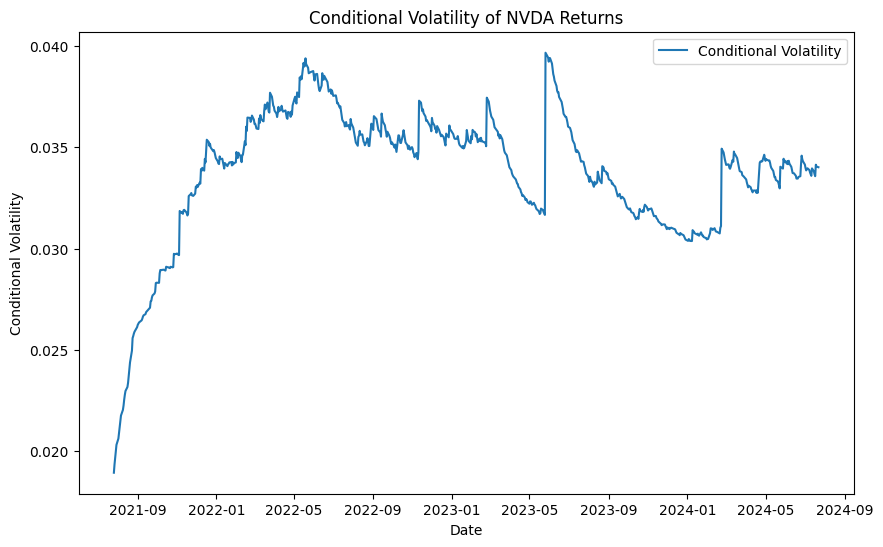

In [26]:
import matplotlib.pyplot as plt

# Reset the index to convert multi-level index to columns
conditional_volatility = fitted_model.conditional_volatility.reset_index()

# Filter the data for the specific ticker (e.g., NVDA)
ticker_data = conditional_volatility[conditional_volatility['symbol'] == ticker]

# Plot the conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(ticker_data['date'], ticker_data['cond_vol'], label='Conditional Volatility')
plt.title(f'Conditional Volatility of {ticker} Returns')
plt.xlabel('Date')
plt.ylabel('Conditional Volatility')
plt.legend()
plt.show()


In [28]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -1477.5637200736678
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2


C:\Users\dhanv\anaconda3\Jupiter\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [30]:
forecasts = res.forecast()

In [32]:
type(forecasts)

arch.univariate.base.ARCHModelForecast

In [36]:
from arch import arch_model


C:\Users\dhanv\anaconda3\Jupiter\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00017. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 159130548.02000326
Iteration:      2,   Func. Count:     18,   Neg. LLF: -854.6567309379448
Iteration:      3,   Func. Count:     27,   Neg. LLF: -1460.4581496402807
Iteration:      4,   Func. Count:     32,   Neg. LLF: -1460.6103640081712
Iteration:      5,   Func. Count:     37,   Neg. LLF: -1461.2610131395834
Iteration:      6,   Func. Count:     42,   Neg. LLF: -1462.7996074685968
Iteration:      7,   Func. Count:     47,   Neg. LLF: -1462.6260846819118
Iteration:      8,   Func. Count:     53,   Neg. LLF: -1463.0645314990356
Iteration:      9,   Func. Count:     58,   Neg. LLF: 73274862033.81387
Iteration:     10,   Func. Count:     69,   Neg. LLF: -1463.071863441838
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1463.0718638899539
            Iterations: 14
            Function evaluations: 69
            Gradient evaluations: 10
[0.00017313 0.00017313 0.00017313]


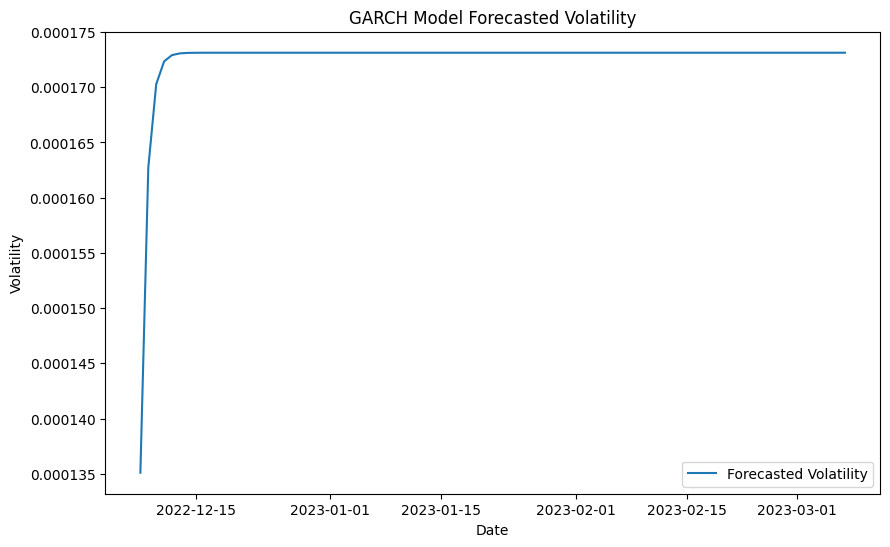

In [48]:
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# Example synthetic data
# Ensure the index is a DatetimeIndex
dates = pd.date_range(start='2021-07-26', periods=500)  # Example date range
returns = pd.Series([0.01, -0.02, 0.015, -0.01, 0.005] * 100, index=dates)  # Replace with your actual data

# Fit GARCH model
model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = model.fit()

# Forecast the volatility
garch_forecast = garch_fit.forecast(horizon=90)

# Extract and print the forecasted variances
forecasted_variance = garch_forecast.variance.values[-1, :]
print(forecasted_variance[-3:])

# Convert index to DatetimeIndex if not already
if not isinstance(returns.index, pd.DatetimeIndex):
    returns.index = pd.to_datetime(returns.index)

# Create the date range for the forecast
forecasted_dates = pd.date_range(start=returns.index[-1] + pd.Timedelta(days=1), periods=90)
forecasted_volatility = pd.Series(forecasted_variance, index=forecasted_dates)

# Plot the forecasted volatility
plt.figure(figsize=(10, 6))
plt.plot(forecasted_volatility, label='Forecasted Volatility')
plt.title('GARCH Model Forecasted Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()
